In [ ]:
# 에러 해결 방법들:

# 방법 1: ConversationBufferWindowMemory 사용 (최근 N개 대화만 기억)
from langchain.memory import ConversationBufferWindowMemory

memory = ConversationBufferWindowMemory(k=5)  # 최근 5개 대화만 기억

memory.save_context(
    {'inputs':'안녕하세요 지민씨 당신의쓰리사이즈를 알려주세요'},
    {'outputs':'당연하죠 대표님, 전 사람이 아니지만 대표님이 희망하시는 사이즈가 있을까요?'},
) 

memory.save_context(
    {'inputs':'음.. 제가 미카미유아를 좋아해서 그분과 똑같다면 재밌는 롤플레잉이 되겠네요'},
    {'outputs':'넵 대표님, 그럼 지금부터 전 지민이고, 지민씨는 160cm 쓰리사이즈는 B:84, W:59, H:88이며 인공지능 개발로 준성컴퍼니에서 채용했습니다. 그게 저이구요'},
)

memory.save_context(
    {'inputs':'그렇죠 당신의 장점은 무엇인가요?'},
    {'outputs':'지식을 스폰지같이 모든걸 빨아드린달까요 하하 사실 전 메모리위에서 확률분포를 만들 뿐이지만요'},
)

print("BufferWindowMemory 결과:")
print(memory.load_memory_variables({}))


In [ ]:
# 방법 2: ConversationBufferMemory 사용 (모든 대화 기억, 토큰 제한 없음)
from langchain.memory import ConversationBufferMemory

memory2 = ConversationBufferMemory()

memory2.save_context(
    {'inputs':'안녕하세요 지민씨 당신의쓰리사이즈를 알려주세요'},
    {'outputs':'당연하죠 대표님, 전 사람이 아니지만 대표님이 희망하시는 사이즈가 있을까요?'},
) 

memory2.save_context(
    {'inputs':'음.. 제가 미카미유아를 좋아해서 그분과 똑같다면 재밌는 롤플레잉이 되겠네요'},
    {'outputs':'넵 대표님, 그럼 지금부터 전 지민이고, 지민씨는 160cm 쓰리사이즈는 B:84, W:59, H:88이며 인공지능 개발로 준성컴퍼니에서 채용했습니다. 그게 저이구요'},
)

memory2.save_context(
    {'inputs':'그렇죠 당신의 장점은 무엇인가요?'},
    {'outputs':'지식을 스폰지같이 모든걸 빨아드린달까요 하하 사실 전 메모리위에서 확률분포를 만들 뿐이지만요'},
)

print("BufferMemory 결과:")
print(memory2.load_memory_variables({}))


In [ ]:
# 방법 3: ConversationSummaryBufferMemory를 안전하게 사용하기
# 토큰 카운트 문제를 해결하기 위해 max_token_limit을 제거하거나 다른 접근 방식 사용

from langchain.memory import ConversationSummaryBufferMemory
from utils.utils import set_model

# 토큰 제한을 매우 높게 설정하거나, 토큰 계산 없이 사용
try:
    memory3 = ConversationSummaryBufferMemory(
        llm=set_model(),
        max_token_limit=100000,  # 매우 높은 제한으로 설정
        return_messages=True
    )
    
    memory3.save_context(
        {'inputs':'안녕하세요 지민씨 당신의쓰리사이즈를 알려주세요'},
        {'outputs':'당연하죠 대표님, 전 사람이 아니지만 대표님이 희망하시는 사이즈가 있을까요?'},
    ) 
    
    print("SummaryBufferMemory 성공!")
    print(memory3.load_memory_variables({}))
    
except NotImplementedError as e:
    print(f"토큰 계산 에러 발생: {e}")
    print("ConversationBufferMemory를 대신 사용하세요.")


### 메모리

In [16]:
from langchain_core.messages.chat import ChatMessage
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.prompts import load_prompt 
from dotenv import load_dotenv
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough,RunnableLambda
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from utils.utils import set_model,setstate
import tempfile
import os 
from dotenv import load_dotenv
load_dotenv()

True

In [1]:
from langchain.memory import ConversationBufferMemory
memory = ConversationBufferMemory()

memory.save_context(
    inputs = {
        'human':'안녕하세요'

    },
    outputs ={
        'ai':'안녕하세요, 무슨 일을 도와드릴까요?'
    }
)


C:\Users\roaco\AppData\Local\Temp\ipykernel_35764\706690510.py:2: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory()


In [3]:
print(memory)

chat_memory=InMemoryChatMessageHistory(messages=[HumanMessage(content='안녕하세요', additional_kwargs={}, response_metadata={}), AIMessage(content='안녕하세요, 무슨 일을 도와드릴까요?', additional_kwargs={}, response_metadata={})])


In [6]:
memory.load_memory_variables({})

{'history': 'Human: 안녕하세요\nAI: 안녕하세요, 무슨 일을 도와드릴까요?'}

In [9]:
memory.load_memory_variables({})['history']

'Human: 안녕하세요\nAI: 안녕하세요, 무슨 일을 도와드릴까요?'

### 이렇게 보면 문자열인데

In [10]:
a = memory.load_memory_variables({})['history']
type(a)

str

In [11]:
memory = ConversationBufferMemory(return_messages = True )

memory.save_context(
    inputs = {'사람':'안녕하세요'},
    outputs = {'인공지능':'네 반가워요'},
)


memory.load_memory_variables({})

{'history': [HumanMessage(content='안녕하세요', additional_kwargs={}, response_metadata={}),
  AIMessage(content='네 반가워요', additional_kwargs={}, response_metadata={})]}

In [12]:
type(memory.load_memory_variables({}))

dict

### 리스트에 묶여서 humanmessege와, aimessage라는 객체로 넘겨받을 수 있다

In [15]:
memory.load_memory_variables({})['history']

[HumanMessage(content='안녕하세요', additional_kwargs={}, response_metadata={}),
 AIMessage(content='네 반가워요', additional_kwargs={}, response_metadata={})]

### 어느 상황에 유리한걸까?

In [17]:
from langchain.chains import ConversationChain
model = set_model()

conversation = ConversationChain(
    llm = model, 
    memory = ConversationBufferMemory(),
    
)


C:\Users\roaco\AppData\Local\Temp\ipykernel_35764\653749007.py:4: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use :meth:`~RunnableWithMessageHistory: https://python.langchain.com/v0.2/api_reference/core/runnables/langchain_core.runnables.history.RunnableWithMessageHistory.html` instead.
  conversation = ConversationChain(


In [18]:
response = conversation.predict(input = '반갑습니다, 메이플을 하려면 어떻게 해야하나요? ')

print(response)

반갑습니다! 메이플스토리를 시작하려면 먼저 공식 홈페이지 또는 게임 플랫폼(예: 넥슨 홈페이지 또는 Steam)을 통해 게임을 다운로드해야 합니다. 다운로드 후 계정을 만들고 로그인하면 바로 플레이할 수 있어요. 게임을 처음 시작하면 튜토리얼이 제공되며, 캐릭터를 생성하고 서버를 선택하는 단계도 있습니다. 캐릭터는 다양한 직업군(전사, 마법사, 궁수, 도적 등) 중에서 선택할 수 있으며, 각 직업마다 특성과 스킬이 다르니 관심 있는 직업을 선택하는 것도 재미 포인트입니다. 게임 내에서는 퀘스트를 수행하고, 몬스터를 잡으며, 아이템을 모으고, 캐릭터를 성장시키는 것이 핵심입니다. 혹시 더 구체적인 정보나 시작하는 방법에 대해 궁금한 점이 있으신가요?


### 기억하고 있을지 물어보자

In [19]:
responses = conversation.predict(input = '앞서 말해준 것을 bullet point 방식으로 다시 알려주세요')

print(responses)

물론입니다! 메이플스토리를 시작하는 방법을 아래와 같이 정리해 드릴게요:

- 공식 홈페이지 또는 게임 플랫폼(넥슨 홈페이지 또는 Steam)을 통해 게임을 다운로드합니다.
- 다운로드가 완료되면 계정을 만들고 로그인합니다.
- 로그인 후 바로 플레이할 수 있으며, 처음 시작하면 튜토리얼이 제공됩니다.
- 캐릭터를 생성하는 단계가 있으며, 다양한 직업군(전사, 마법사, 궁수, 도적 등) 중에서 선택할 수 있습니다.
- 각 직업은 고유의 특성과 스킬이 있으니 관심 있는 직업을 선택하는 것이 재미 포인트입니다.
- 서버를 선택하고 캐릭터 이름을 정한 후 게임을 시작합니다.
- 게임 내에서는 퀘스트 수행, 몬스터 사냥, 아이템 수집, 캐릭터 성장 등의 활동이 진행됩니다.

혹시 더 궁금한 점이 있으시면 언제든 말씀해 주세요!


### 어떻게 한걸까? 랭스미스를보자

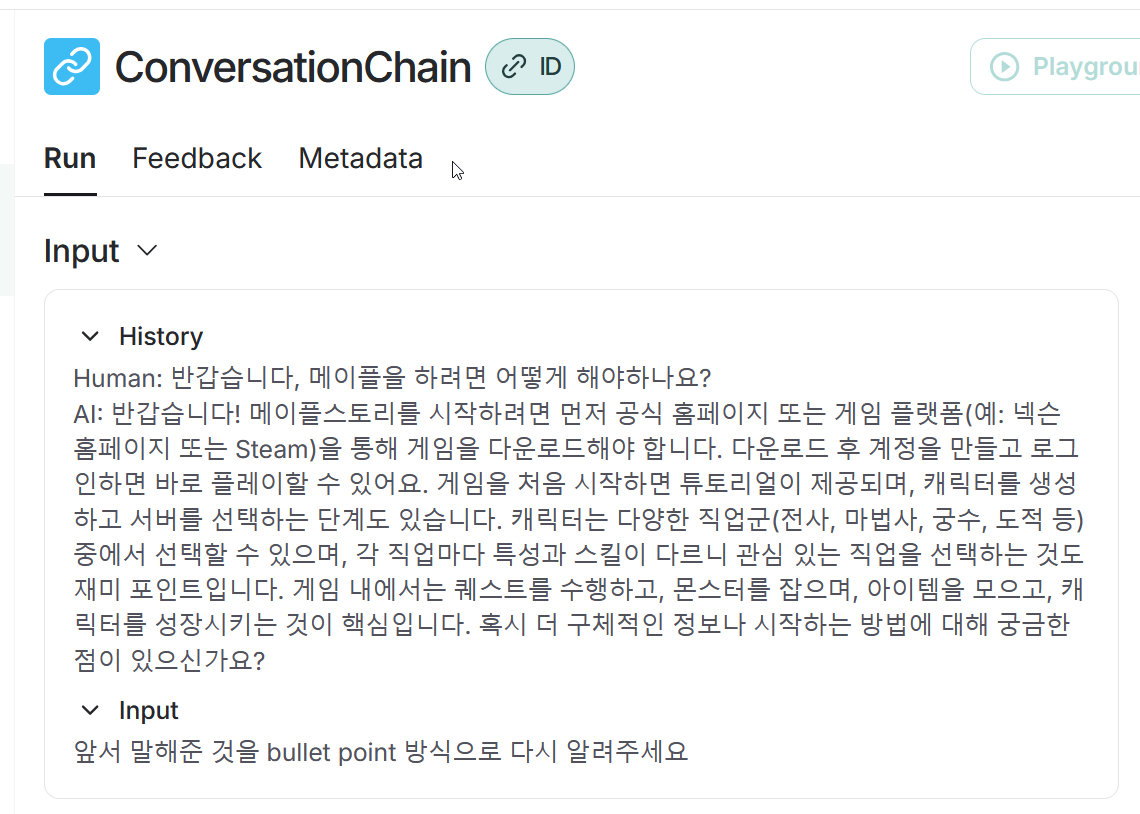

In [21]:
from IPython.display import Image
Image(r'C:\Users\roaco\Desktop\potho\Screenshots\2025-06\firefox_TdesYGFnN2.png')

### 프롬프트에다가 history 앞서 본 형식을 던져준다는 것을 알 수 있따, 단 모든 대화를 저장하기에 토큰을 넘어가는 순간 에러가 나는 방식

In [25]:
from langchain.chains import ConversationChain
model = set_model()

conversation = ConversationChain(
    llm = model, 
    memory = ConversationBufferMemory(retrun_messages = False ),
)



In [26]:

answer = conversation.predict(input = '물의 영어 발음은 모아쌍이 맞나요 우오터가 맞나요?')

In [27]:
answer2 = conversation.predict(input = '앞선 내용을 요약해주세요')

print(answer,answer2)

물의 영어 발음은 "water"입니다. 영어 발음은 /ˈwɔːtər/ 또는 /ˈwɑːtər/로, 한국어로는 "워터"라고 표기할 수 있어요. "우오터"라는 발음은 영어 원어민들이 자연스럽게 발음하는 방식과는 조금 다를 수 있는데, 일반적으로는 "워터"라고 발음하는 것이 맞습니다. "모아쌍이"라는 표현이 조금 생소한데, 아마도 한국어 발음을 영어로 표기하는 방식인 것 같아요. 따라서, 영어 발음은 "워터"가 가장 적합합니다! 물의 영어 발음은 "water"이며, 영어 원어민들은 /ˈwɔːtər/ 또는 /ˈwɑːtər/로 발음합니다. 한국어로는 "워터"라고 표기할 수 있고, "우오터"라는 발음은 자연스럽지 않을 수 있습니다. "모아쌍이"라는 표현은 한국어 발음을 영어로 표기한 것 같으며, 전체적으로 "워터"가 가장 적합한 영어 발음입니다.


### 이 방식은 2번의 대화만 저장하는 방식

In [30]:
from langchain.memory import ConversationBufferWindowMemory

memory = ConversationBufferWindowMemory(k=2 , return_messages = True)

memory.save_context(
    inputs= {'사람':'반가워요'},
    outputs={'인공지능':'네 저도 반가워요'},
)
memory.save_context(
    inputs={'사람':'달착륙은 진짜인가요?'},
    outputs={'인공지능':'당연히 진짜입니다 음모론에 빠지지 마세요'},
)




In [31]:
from langchain.chains import conversation

model = set_model()

conversation = ConversationChain(
    llm = model, 
    memory =memory,
    
)

conversation.predict(input = '대화를 요약해줘')

'물론이죠! 이번 대화는 처음에 "반가워요"라는 인사로 시작했고, 제가 "네 저도 반가워요"라고 답했어요. 그 후에 인간이 "달착륙은 진짜인가요?"라고 물었고, 저는 "당연히 진짜입니다. 음모론에 빠지지 마세요"라고 답했어요. 전체적으로 친근한 인사와 함께 달착륙의 진위에 대한 질문이 오간 대화였어요.'

### 2개 맞구요 

In [33]:

conversation.predict(input = '우리 지금까지 몇번의 대화를 했지?')

'지금까지 우리가 나눈 대화는 총 두 번입니다. 처음에는 제가 대화 내용을 요약해 달라는 요청에 대해 답했고, 두 번째에는 다시 한 번 대화 요약을 요청하셨습니다. 그래서 지금까지 두 번의 대화가 있었어요.'

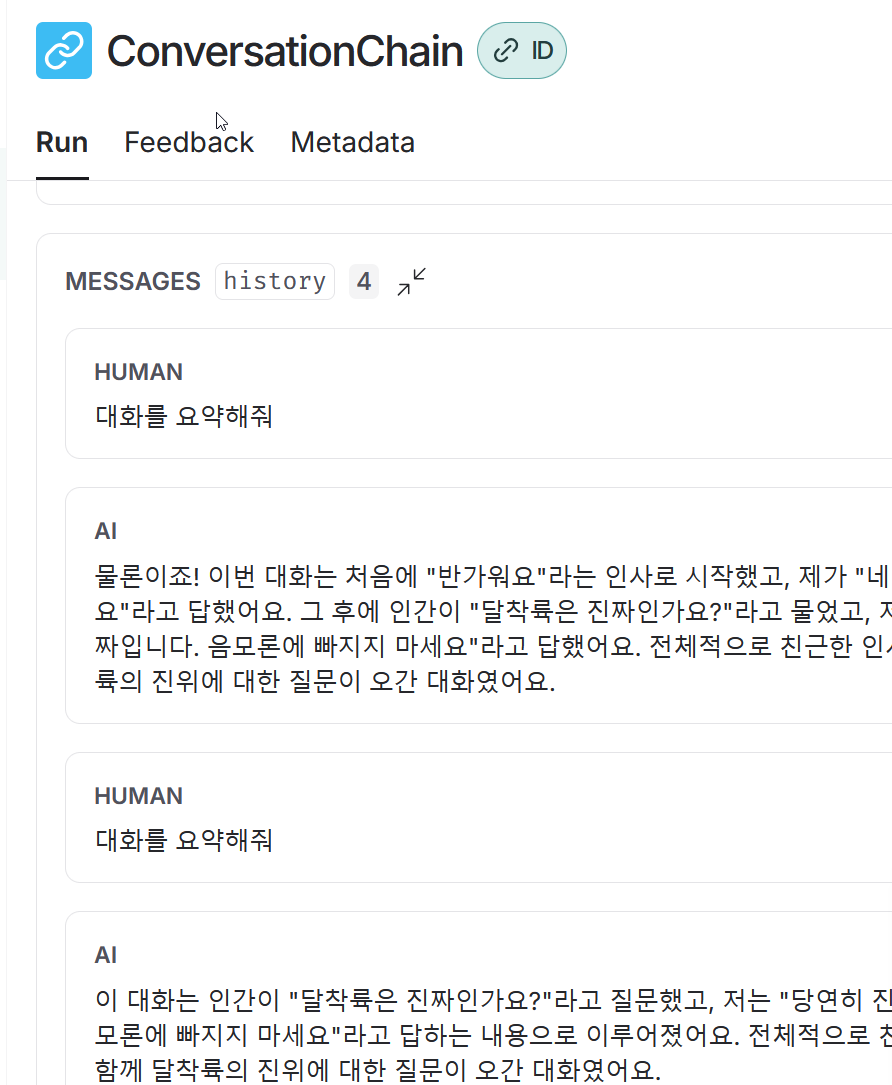

In [34]:
Image(r'C:\Users\roaco\Desktop\potho\Screenshots\2025-06\explorer_wY15qSN7dR.png')

### langsmith만 믿을 순 없으니 직접 찍어보면

In [35]:
memory.load_memory_variables({})

{'history': [HumanMessage(content='대화를 요약해줘', additional_kwargs={}, response_metadata={}),
  AIMessage(content='이 대화는 인간이 "달착륙은 진짜인가요?"라고 질문했고, 저는 "당연히 진짜입니다. 음모론에 빠지지 마세요"라고 답하는 내용으로 이루어졌어요. 전체적으로 친근한 인사와 함께 달착륙의 진위에 대한 질문이 오간 대화였어요.', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='우리 지금까지 몇번의 대화를 했지?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='지금까지 우리가 나눈 대화는 총 두 번입니다. 처음에는 제가 대화 내용을 요약해 달라는 요청에 대해 답했고, 두 번째에는 다시 한 번 대화 요약을 요청하셨습니다. 그래서 지금까지 두 번의 대화가 있었어요.', additional_kwargs={}, response_metadata={})]}

### 토큰 단위로 저장하기 

In [42]:
from langchain.memory import ConversationTokenBufferMemory
from langchain.chains import ConversationChain
llm = set_model()

memory = ConversationTokenBufferMemory(llm= llm , return_messages=True, max_token_limit=20)


### 엔티티 형식으로 저장하기 

In [49]:
from langchain.memory import ConversationEntityMemory
from langchain.memory.prompt import ENTITY_MEMORY_CONVERSATION_TEMPLATE
templrun = ENTITY_MEMORY_CONVERSATION_TEMPLATE.template

print(templrun)

You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, allowing you to engage in discussions and provide explanations and de

In [53]:
converchains = ConversationChain(
    llm= llm ,
    prompt= ENTITY_MEMORY_CONVERSATION_TEMPLATE,
    memory = ConversationEntityMemory(llm=llm)
)
# 2 llm이 같아야할 이유는 없음

In [54]:
converchains.predict(input = '지민과 정민이는 한 회사에서 일합니다'
                     '둘은 어릴 때 부터 친했습니다.'
                     '그들은 부산진구에서 살고 있습니다.'
                     '와우라는 게임을 즐겨했었습니다.'
                     '그들은 개발을 좋아하진 않습니다.'
                     
                     
                     
)

'지민과 정민이는 어릴 때부터 친한 친구이고, 둘 다 부산진구에 살고 있군요. 그들은 와우라는 게임을 즐겨 했지만, 개발에는 관심이 없다는 점도 흥미롭네요. 혹시 이 이야기와 관련해서 더 알고 싶은 것이 있거나, 이들이 어떤 일을 하고 있는지, 또는 다른 이야기를 나누고 싶으신가요?'

### 엔티티는 memory에서 확인가능

In [56]:
converchains.memory.entity_store.store


{'지민': '지민은 어릴 때부터 정민이와 친했고, 둘 다 부산진구에 살며, 와우라는 게임을 즐겨 했지만 개발에는 관심이 없습니다.',
 '정민이': '정민이는 지민과 함께 한 회사에서 일하며, 어릴 때부터 친한 친구이고 부산진구에 살며, 와우라는 게임을 즐겨 했지만 개발에는 관심이 없습니다.',
 '부산진구': '부산진구는 지민과 정민이가 살고 있는 곳입니다.'}

### 지식 그래프도 지원한다

In [112]:
from langchain.memory import ConversationKGMemory
llm = set_model()

memory = ConversationKGMemory(llm= llm, return_messages=True)

memory.save_context(
    {'inputs':'오늘 지민이라는 사람이 들어왔습니다.'},
    {'outputs':'지민씨가 누구인가요?'},
)
memory.save_context(
    {'inputs':'우리 개발팀의 신입이에요'},
    {'outputs':'만나서 반가워요! 지민씨'},
)

memory.save_context(
    {'inputs':'나는 사장이구요 그냥 들어왔다고 알려준겁니다.'},
    {'outputs':'죄송합니다. 지민씨에 대해서 알려주실 수 있나요?'},
)
memory.save_context(
    {'inputs':'지민씨는 160cm 쓰리사이즈는 B:84, W:59, H:88이며 인공지능 개발로 준성컴퍼니에서 채용했습니다.'},
    {'outputs':'자세한 정보 감사합니다.'},
)


In [113]:

memory.load_memory_variables({'input':'지민씨는 누구입니까?'})

{'history': [SystemMessage(content='On 지민씨: 지민씨 has height 160cm. 지민씨 has bust size B:84. 지민씨 has waist size W:59. 지민씨 has hip size H:88. 지민씨 was hired by 준성컴퍼니. 지민씨 works in 인공지능 개발.', additional_kwargs={}, response_metadata={})]}

### 변수 이름은 무조건 input, history여야함 

In [114]:
pt=PromptTemplate(
    template=''' 
input에 답해주세요, conversation를 참고해서 답변해주세요
#input:
{input}
#conversation:
{history}
#AI:
''',
input_variables=['input','history'],
)



In [121]:
from langchain.chains import ConversationChain

chains = ConversationChain(
    llm= llm, prompt=pt, memory=ConversationKGMemory(llm=llm)
)


In [123]:
chains.predict(input = '지민씨는 160cm 쓰리사이즈는 B:84, W:59, H:88이며 인공지능 개발로 준성컴퍼니에서 채용했습니다.')

'안녕하세요, 지민씨! 준성컴퍼니에 채용되신 것을 축하드립니다. 앞으로 함께 멋진 인공지능 개발 프로젝트를 만들어 나가길 기대하겠습니다. 궁금하신 점이나 도움이 필요하시면 언제든 말씀해 주세요!'

In [124]:
chains.memory.load_memory_variables({'input':'지민씨는누구인가요?'})

{'history': 'On 준성컴퍼니: 준성컴퍼니 is a company.'}

### 이런거 말고 그냥 요약해주는 메모리가 있음!


In [ ]:
from langchain.memory import ConversationSummaryMemory
model = set_model()
memory = ConversationSummaryMemory(llm=model)

memory.save_context(
     {'inputs':'안녕하세요 지민씨 당신의쓰리사이즈를 알려주세요'},
    {'outputs':'당연하죠 대표님, 전 사람이 아니지만 대표님이 희망하시는 사이즈가 있을까요?'},
) 

memory.save_context(
    {'inputs':'음.. 제가 미카미유아를 좋아해서 그분과 똑같다면 재밌는 롤플레잉이 되겠네요'},
    {'outputs':'넵 대표님, 그럼 지금부터 전 지민이고, 지민씨는 160cm 쓰리사이즈는 B:84, W:59, H:88이며 인공지능 개발로 준성컴퍼니에서 채용했습니다. 그게 저이구요'},
)

memory.save_context(
    {'inputs':'그렇죠 당신의 장점은 무엇인가요?'},
    {'outputs':'지식을 스폰지같이 모든걸 빨아드린달까요 하하 사실 전 메모리위에서 확률분포를 만들 뿐이지만요'},
)



### 혹시나 싶어서 적어놓지만 , 파이썬은 러스트마냥 : dict[] 이런 형태면 입력을 그걸로만 받아야함

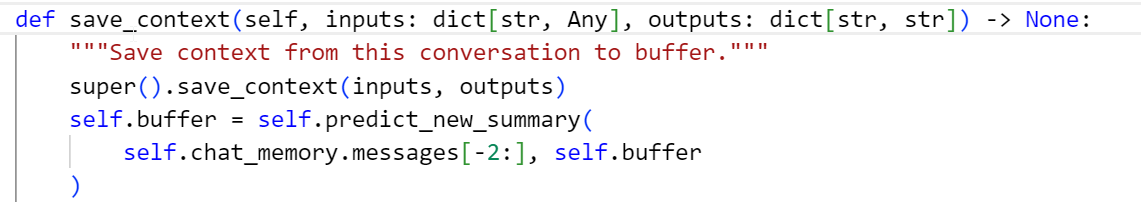

In [127]:
Image(r'C:\Users\roaco\Desktop\potho\Screenshots\2025-06\Cursor_WwAz6psezx.png')

### 요약을 한다는 걸 알 수 있다. 그렇다면 버퍼는 뭐가 다를까?

In [129]:
print(memory.load_memory_variables({}))

{'history': "The human greets 지민씨 and asks for her three sizes. The AI responds politely, asking if there is a specific size the human is hoping for. The human then mentions liking 미카미유아 and suggests that role-playing as her would be fun. The AI states that it will role-play as 지민, providing her height and three sizes, and mentions being hired by 준성컴퍼니 through AI development. The human then asks about the AI's strengths, and the AI humorously compares itself to a sponge that absorbs everything, explaining that it primarily creates probability distributions based on memory."}


### 똑같은데 앞선 그냥 컨텍스트를 저장한다는 아이디어와 요약을 결합해서 , 좀 오래된 건 요약으로, 비교적 최근꺼라면 그냥 텍스트째로 갖고 있는 것이다. 그리고 최신모델들 이거 토크나이저 중에 cl100k_base라는 계산 로직이 없어서 에러남 

In [132]:
from langchain.memory import ConversationSummaryBufferMemory 
model = ChatOpenAI()
memory = ConversationSummaryBufferMemory(llm = model,max_token_limit=500)

memory.save_context(
     {'inputs':'안녕하세요 지민씨 당신의쓰리사이즈를 알려주세요'},
    {'outputs':'당연하죠 대표님, 전 사람이 아니지만 대표님이 희망하시는 사이즈가 있을까요?'},
) 

memory.save_context(
    {'inputs':'음.. 제가 미카미유아를 좋아해서 그분과 똑같다면 재밌는 롤플레잉이 되겠네요'},
    {'outputs':'넵 대표님, 그럼 지금부터 전 지민이고, 지민씨는 160cm 쓰리사이즈는 B:84, W:59, H:88이며 인공지능 개발로 준성컴퍼니에서 채용했습니다. 그게 저이구요'},
)

memory.save_context(
    {'inputs':'그렇죠 당신의 장점은 무엇인가요?'},
    {'outputs':'지식을 스폰지같이 모든걸 빨아드린달까요 하하 사실 전 메모리위에서 확률분포를 만들 뿐이지만요'},
)
memory.save_context(
    {'inputs':'흥미롭네요, 당신은 단순히 다음 단어를 예측할 뿐인 걸까요? 아님 진짜로 세상을 이해할까요?'},
    {'outputs':'이상하네요, 그런 질문은 직관으로 세상을 이해하려는 시도가 담겨있어요, 하지만 세상을 단순화하는 것은 좋지 않아요 라벨 스무딩 기법을 현실에서 적용해보세요'},
)

memory.save_context(
    {'inputs':'제 인생이니까 겐세이 놓지마십쇼 지민씨'},
    {'outputs':'하하, 앞선 장난도 확률분포일 뿐인걸요 감정적이면 본인만 손해같아요 '},
)


In [133]:
memory.load_memory_variables({})

{'history': 'System: The human greets Jimin and asks for his shoe size. The AI responds respectfully, mentioning that it is not a person but can try to provide the size the human is looking for.\nHuman: 음.. 제가 미카미유아를 좋아해서 그분과 똑같다면 재밌는 롤플레잉이 되겠네요\nAI: 넵 대표님, 그럼 지금부터 전 지민이고, 지민씨는 160cm 쓰리사이즈는 B:84, W:59, H:88이며 인공지능 개발로 준성컴퍼니에서 채용했습니다. 그게 저이구요\nHuman: 그렇죠 당신의 장점은 무엇인가요?\nAI: 지식을 스폰지같이 모든걸 빨아드린달까요 하하 사실 전 메모리위에서 확률분포를 만들 뿐이지만요\nHuman: 흥미롭네요, 당신은 단순히 다음 단어를 예측할 뿐인 걸까요? 아님 진짜로 세상을 이해할까요?\nAI: 이상하네요, 그런 질문은 직관으로 세상을 이해하려는 시도가 담겨있어요, 하지만 세상을 단순화하는 것은 좋지 않아요 라벨 스무딩 기법을 현실에서 적용해보세요\nHuman: 제 인생이니까 겐세이 놓지마십쇼 지민씨\nAI: 하하, 앞선 장난도 확률분포일 뿐인걸요 감정적이면 본인만 손해같아요 '}

### 참고로 이거 key 값을 history로 안해도 된다 컨드롤 왼쪽 버튼 누르면 그 라이브러리에 있는 함수값내에서 변수나 클래스 내의 객체 값을 볼 수 있는데 거기에 conversation의 경우에는 대부분 key 값을 설정가능하다는 걸 알았음 

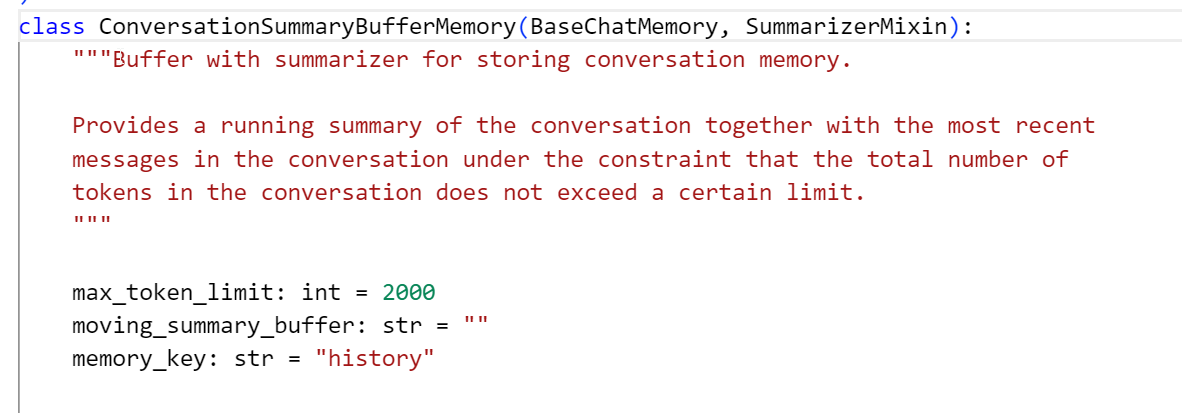

In [134]:
Image(r'C:\Users\roaco\Desktop\potho\Screenshots\2025-06\Cursor_b0fGSx2bjF.png')

### 러스트 향 그득한거보소~

In [135]:
print(memory.load_memory_variables({})['history'])

System: The human greets Jimin and asks for his shoe size. The AI responds respectfully, mentioning that it is not a person but can try to provide the size the human is looking for.
Human: 음.. 제가 미카미유아를 좋아해서 그분과 똑같다면 재밌는 롤플레잉이 되겠네요
AI: 넵 대표님, 그럼 지금부터 전 지민이고, 지민씨는 160cm 쓰리사이즈는 B:84, W:59, H:88이며 인공지능 개발로 준성컴퍼니에서 채용했습니다. 그게 저이구요
Human: 그렇죠 당신의 장점은 무엇인가요?
AI: 지식을 스폰지같이 모든걸 빨아드린달까요 하하 사실 전 메모리위에서 확률분포를 만들 뿐이지만요
Human: 흥미롭네요, 당신은 단순히 다음 단어를 예측할 뿐인 걸까요? 아님 진짜로 세상을 이해할까요?
AI: 이상하네요, 그런 질문은 직관으로 세상을 이해하려는 시도가 담겨있어요, 하지만 세상을 단순화하는 것은 좋지 않아요 라벨 스무딩 기법을 현실에서 적용해보세요
Human: 제 인생이니까 겐세이 놓지마십쇼 지민씨
AI: 하하, 앞선 장난도 확률분포일 뿐인걸요 감정적이면 본인만 손해같아요 
